# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\projects\LAB-4(pwds)\Lab-4\Lab-4-Unsupervised learing\marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
# lets check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
## lets check missing values in the dataset
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [5]:
# Filling the missing value in the income my mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

## Lets recheck the missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [6]:
## Check duplicated records in the dataset
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [7]:
## dropping redundant columns
df = df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
# Checking number of unique categories present in the "Marital_Status"
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd','Single'])

In [10]:
## recheck after grouping the categories.
df['Marital_Status'].value_counts()

Marital_Status
relationship    2238
Single             2
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [11]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [12]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [13]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [14]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [15]:
# Dropping the columns, since we have grouped them

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [16]:
# Adding a column "Age" in the dataframe
df['Age'] = 2024 - df["Year_Birth"]

In [17]:
df.drop('Year_Birth',axis=1,inplace=True)

In [18]:
df.head(2)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,0,27,6,2,0,70


### 13. Encode the categorical variables in the dataset

In [19]:
## Label Encoding
cate=['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [20]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,0,1617,25,0,1,67
1,2,0,46344.0,38,0,27,6,2,0,70
2,2,1,71613.0,26,0,776,21,0,0,59
3,2,1,26646.0,26,0,53,8,1,0,40
4,4,1,58293.0,94,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [21]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [22]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-33.451457,0.235327,0.307039,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-33.451457,-0.235826,-0.383664,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.029894,0.773633,-0.798086,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [23]:

## step1: Calculate the covariance matrix.
cov_matrix = np.cov(scaled_features.T)
cov_matrix


array([[ 1.00044663e+00,  1.04718210e-02,  1.20027297e-01,
        -1.17336854e-02, -5.05625191e-02,  9.20951775e-02,
         9.40543885e-02,  5.32130438e-02,  6.32789156e-02,
         1.71466853e-01],
       [ 1.04718210e-02,  1.00044663e+00,  7.46885116e-06,
         1.14582655e-03,  2.90944316e-03, -1.07388759e-02,
        -2.48575745e-03, -1.97172732e-03, -1.78451298e-03,
        -3.32133463e-02],
       [ 1.20027297e-01,  7.46885116e-06,  1.00044663e+00,
        -3.94826239e-03, -2.72352757e-02,  6.65003374e-01,
         5.63621397e-01, -2.90841549e-01,  2.87174434e-01,
         1.61013782e-01],
       [-1.17336854e-02,  1.14582655e-03, -3.94826239e-03,
         1.00044663e+00,  1.32369878e-02,  2.04417334e-02,
         5.74294350e-03,  1.80614498e-02, -8.90020337e-02,
         1.98799637e-02],
       [-5.05625191e-02,  2.90944316e-03, -2.72352757e-02,
         1.32369878e-02,  1.00044663e+00, -3.70750313e-02,
        -2.05918545e-02,  3.10801443e-02, -1.76167581e-02,
         3.

In [24]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [2.82748636 0.16260952 1.25623781 0.44644014 0.69131577 0.72355444
 0.84401725 1.04880229 1.00589462 0.99810807]


eigein vectors 
 [[-9.67709770e-02 -1.15907157e-02  5.44956724e-01 -4.73535887e-02
   6.57994983e-02  3.20711972e-01 -6.61051694e-01  3.63112181e-01
   1.22789727e-01  1.33409793e-02]
 [ 5.38808868e-03  9.32901127e-03 -6.39339254e-02 -6.12466217e-03
   4.14048459e-02 -5.93104605e-02  1.34135949e-01  9.01467150e-02
   8.15313907e-01  5.47422267e-01]
 [-4.70873050e-01 -1.73743499e-01  1.04835166e-01  8.06853054e-01
  -2.00993706e-01  1.58007589e-01  1.31252620e-01 -5.47913162e-02
   2.13660951e-02  6.22790005e-03]
 [ 1.22991931e-02 -3.96083455e-02  1.23063644e-01  1.79272087e-02
  -2.00067663e-03 -2.01729594e-01 -3.16494146e-01 -7.01328632e-01
   4.10986563e-01 -4.25646195e-01]
 [ 3.34226233e-02  5.91089123e-03  2.70830282e-02  2.19132963e-03
  -1.22585737e-02  1.21538560e-01 -2.73314625e-01 -5.39781097e-01
  -3.54672078e-01  7.00950072e-01]
 [-5.54307744e-01 

In [25]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [28.262240928492204, 12.556769888873523, 10.483340776563766, 10.05445559518372, 9.976624866193577, 8.436404558014413, 7.232314236746699, 6.910071511651432, 4.462408344314006, 1.62536929396667]
Cummulative Variance Explained:  [ 28.26224093  40.81901082  51.30235159  61.35680719  71.33343206
  79.76983661  87.00215085  93.91222236  98.37463071 100.        ]


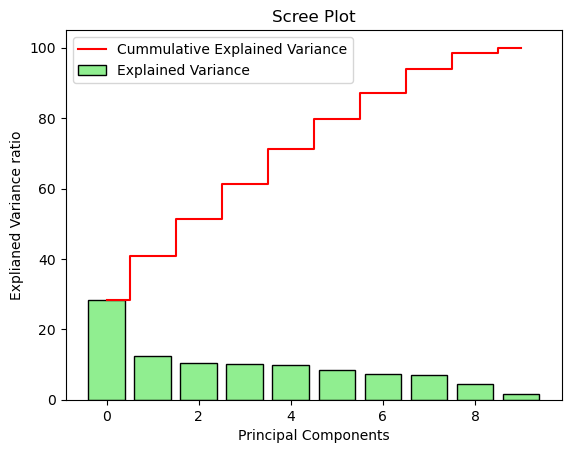

In [26]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [27]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.552300,2.083577,3.555111,27.254563,18.470470,3.991986,1.617231,0.583097
1,-1.533506,3.287413,2.767474,27.589352,18.068066,3.578916,1.252582,1.331065
2,1.170127,-0.350686,-0.154326,0.235408,-0.166706,-0.960315,0.888801,-0.708128
3,-1.768230,-1.177131,-0.682938,0.171404,-0.130093,0.108587,0.505934,0.102668
4,0.026266,0.521027,0.599706,-1.049478,0.830567,1.449039,0.984874,0.634213


In [28]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

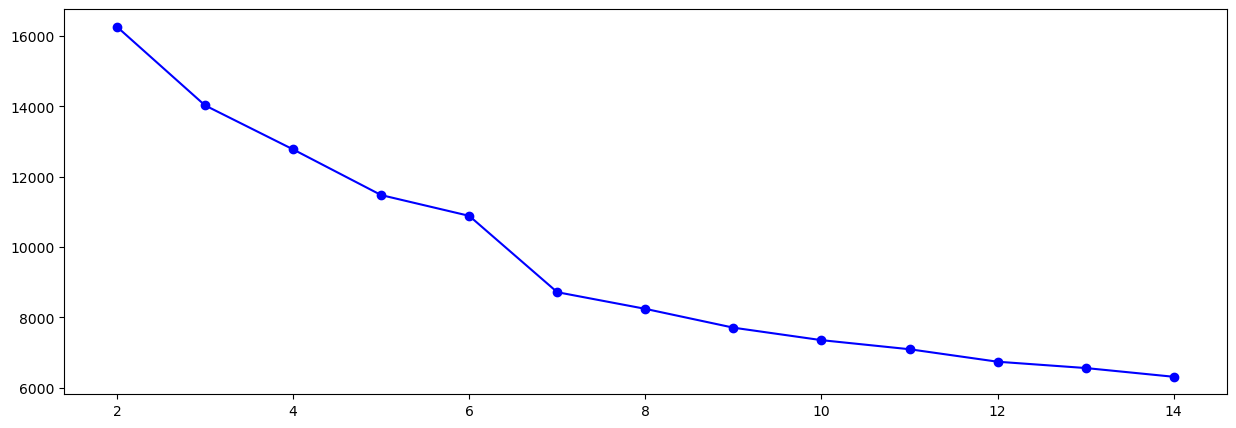

In [29]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [30]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [31]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [32]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.552300,2.083577,3.555111,27.254563,18.470470,3.991986,1.617231,0.583097,2
1,-1.533506,3.287413,2.767474,27.589352,18.068066,3.578916,1.252582,1.331065,2
2,1.170127,-0.350686,-0.154326,0.235408,-0.166706,-0.960315,0.888801,-0.708128,1
3,-1.768230,-1.177131,-0.682938,0.171404,-0.130093,0.108587,0.505934,0.102668,0
4,0.026266,0.521027,0.599706,-1.049478,0.830567,1.449039,0.984874,0.634213,0


In [33]:
kmeans_df['Label'].value_counts()

Label
0    1247
1     991
2       2
Name: count, dtype: int64

### Visualization and Interpretation of results

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

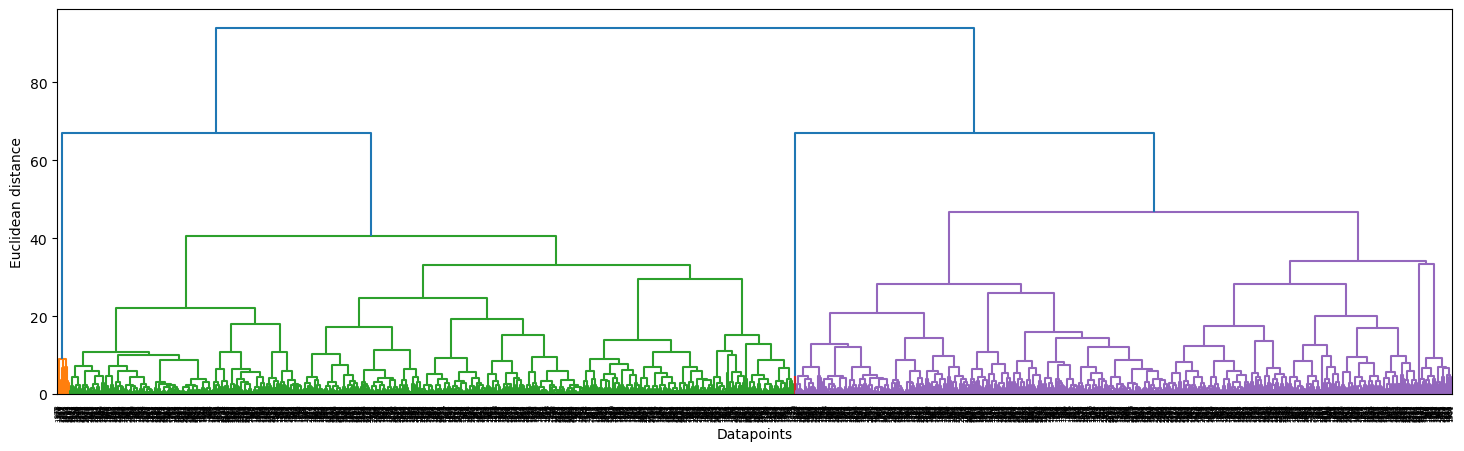

In [34]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.22514587927893848
3 0.22712158904424337
4 0.23865153082236382
5 0.1729237885170982
6 0.11287381563727486
7 0.11320234749168825
8 0.11192273171381874
9 0.11209570435350738
10 0.11599226088905866
11 0.10984673957820879
12 0.11450186266493279
13 0.1213189440154726
14 0.11625496458061976


In [ ]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [ ]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

In [ ]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier = dfc.join(df_label1)
df_hier.head()

In [ ]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

In [ ]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

In [ ]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

In [ ]:
sns.barplot(df_hier['Labels'],df_hier['NumTotalPurchases'])
plt.show()

-----
## Happy Learning
-----